# GRAPE for TO and Noise-Robust Gates

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Testing Existing GRAPE Implementation

In [2]:
from pulse_optimization_universal import run_grape
from utilities import amplitude_function_from_pulse_area

In [3]:
H_drift = [
    np.zeros((2, 2), dtype=complex),
    np.zeros((2, 2), dtype=complex), 
    np.zeros((2, 2), dtype=complex), 
    np.zeros((3, 3), dtype=complex)
]   # All states have detuning 0
H_drive = [
    np.zeros((2, 2), dtype=complex),
    np.array([[0, 1/2], [1/2, 0]], dtype=complex), 
    np.array([[0, 1/2], [1/2, 0]], dtype=complex), 
    np.array([[0, 1/2, 1/2], [1/2, 0, 0], [1/2, 0, 0]], dtype=complex)
]   # coupling strengths
excitation_levels = [
    [[0, 0], [0, 0]],
    [[0, 1], [0, 0]],
    [[0, 0], [0, 1]],
    [[0, 1, 0], [0, 0, 1]]
]   # in both Hamiltonians, the second state is a Rydberg state
single_qubit_phase_weights = [0, 1, 1, 2]

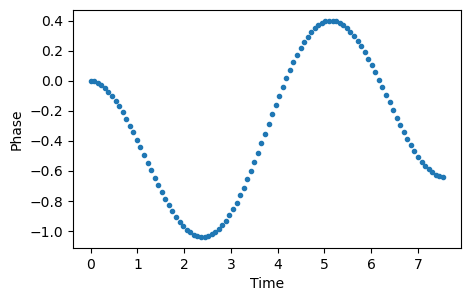

In [4]:
robustness = None
A = 7.61 # pulse area
T, amp = amplitude_function_from_pulse_area(A, 0.0)
cost, phases, theta = run_grape(H_drift, H_drive, excitation_levels, single_qubit_phase_weights, T, target_phase=np.pi, steps=100, consider_global_phase=True, robustness=robustness)#, phase_variation_prefactor=1e-3)

## My GRAPE Implementation

In [6]:
import numpy as np
import qutip
from qutip_qtrl.pulseoptim import optimize_pulse_unitary

In [16]:
tensor_matrix = np.array([[1/2, 0],
                          [0, np.sqrt(2)/2]])
tensor_qobj = qutip.Qobj(tensor_matrix, dims=[[2], [2]])

twoq_icomp = qutip.tensor(tensor_qobj, qutip.sigmax())
twoq_qcomp = qutip.tensor(tensor_qobj, qutip.sigmay())

In [17]:
U_0 = qutip.operators.identity(4)
H_ctrl = [twoq_icomp, twoq_qcomp]

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j         0.-0.5j        0.+0.j         0.+0.j        ]
 [0.+0.5j        0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.-0.70710678j]
 [0.+0.j         0.+0.j         0.+0.70710678j 0.+0.j        ]]